In [23]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.cloud.bigquery import Client

In [24]:
client = Client()

query = """select 
*
from `aa-ai-specialisation.chicago_taxi_trips.local_taxi_trips`
where trip_start_timestamp >= '2023-01-01'
"""
job = client.query(query)
df = job.to_dataframe()

In [25]:
df.shape[0]

6030387

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030387 entries, 0 to 6030386
Data columns (total 23 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   unique_key              object             
 1   taxi_id                 object             
 2   trip_start_timestamp    datetime64[ns, UTC]
 3   trip_end_timestamp      datetime64[ns, UTC]
 4   trip_seconds            Int64              
 5   trip_miles              float64            
 6   pickup_census_tract     Int64              
 7   dropoff_census_tract    Int64              
 8   pickup_community_area   Int64              
 9   dropoff_community_area  Int64              
 10  fare                    float64            
 11  tips                    float64            
 12  tolls                   float64            
 13  extras                  float64            
 14  trip_total              float64            
 15  payment_type            object             
 16  

In [27]:
df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,6.029189e+06,6.030367e+06,2.693188e+06,2.625462e+06,5.800588e+06,5.450560e+06,6.019250e+06,6.019250e+06,6.019250e+06,6.019250e+06,6.019250e+06,5.802861e+06,5.802861e+06,5.488746e+06,5.488746e+06
mean,1.251912e+03,6.559274e+00,1.703151e+10,1.703142e+10,3.558218e+01,2.622682e+01,2.237419e+01,3.011633e+00,6.053472e-02,2.306570e+00,2.792368e+01,4.190253e+01,-8.770143e+01,4.189427e+01,-8.766286e+01
std,1.720413e+03,7.660682e+00,3.752517e+05,3.450478e+05,2.626600e+01,2.100588e+01,2.223605e+01,4.296599e+00,1.297521e+01,2.058612e+01,3.883697e+01,6.275356e-02,1.137484e-01,5.650536e-02,7.436175e-02
min,0.000000e+00,0.000000e+00,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.165022e+01,-8.791362e+01,4.166014e+01,-8.791362e+01
25%,4.800000e+02,9.300000e-01,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,8.250000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.025000e+01,4.187887e+01,-8.775093e+01,4.187887e+01,-8.766352e+01
50%,9.340000e+02,2.920000e+00,1.703132e+10,1.703132e+10,3.200000e+01,2.800000e+01,1.525000e+01,1.420000e+00,0.000000e+00,0.000000e+00,1.851000e+01,4.189503e+01,-8.764265e+01,4.189207e+01,-8.763331e+01
75%,1.740000e+03,1.180000e+01,1.703198e+10,1.703184e+10,5.600000e+01,3.200000e+01,3.500000e+01,4.390000e+00,0.000000e+00,4.000000e+00,4.414000e+01,4.197517e+01,-8.762519e+01,4.192269e+01,-8.762519e+01
max,8.638200e+04,9.454000e+02,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,9.999750e+03,5.000000e+02,6.666660e+03,9.693780e+03,9.999750e+03,4.202122e+01,-8.753139e+01,4.202122e+01,-8.753490e+01


In [28]:
df["payment_type"].unique()

array(['Prcard', 'Unknown', 'Mobile', 'Cash', 'Credit Card', 'No Charge',
       'Dispute'], dtype=object)

In [29]:
df["pickup_community_area"].unique()

<IntegerArray>
[  67,   44,   34,   22,    8,   16,   69,    4,    1,   75,   73,   66,   49,
    5,   15,   31,   27,   57,   14,   53,    7,   60,   48,   28,    6,   70,
   52,   43,   65,   39,   12,   30,   36,   21,   59,   10,   37,   68,   61,
   41,   45,    9,   40,    3,   51,   46,   25,   42,   55,   77,   11,   26,
   72,   13,   54,   64,   29,   58,    2,   17,   23,   50,   71,   19,   62,
   24,   32, <NA>,   20,   63,   47,   18,   74,   38,   35,   56,   76,   33]
Length: 78, dtype: Int64

In [30]:
df["dropoff_community_area"].unique()

<IntegerArray>
[  24,   42,    3,   28,    8,   16,   13,   22,    1,   70,    6, <NA>,   76,
   38,   32,   49,   68,   10,   50,   14,   37,   27,   57,   41,   39,   33,
    2,   36,   15,   53,   12,   30,   35,   44,   59,   77,   55,   67,   34,
   60,   56,   21,    4,   73,   51,   46,   31,    7,    5,   43,   72,   69,
   48,   58,   75,   61,   40,   66,   29,   25,   23,   19,   45,   71,   54,
   11,   62,   20,   65,   47,   17,   74,   26,   63,    9,   18,   64,   52]
Length: 78, dtype: Int64

### Get Unique Values
This will give us an initial idea of how many unique classes there are for each categorical column, which is helpful and relevant in our case.

In [31]:
# To get the actual unique values for a specific column
checked_columns = ['pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'payment_type', 'company']
for column in df[checked_columns]:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

Unique values in pickup_census_tract:
<IntegerArray>
[       <NA>, 17031080202, 17031161100, 17031080100, 17031081100, 17031081202,
 17031071400, 17031833000, 17031060900, 17031841900,
 ...
 17031980100, 17031081401, 17031320400, 17031081403, 17031081300, 17031320100,
 17031320600, 17031081201, 17031839100, 17031280100]
Length: 645, dtype: Int64


Unique values in dropoff_census_tract:
<IntegerArray>
[       <NA>, 17031080300, 17031161100, 17031280100, 17031838300, 17031839100,
 17031980000, 17031081700, 17031060900, 17031841900,
 ...
 17031829800, 17031640500, 17031811000, 17031700100, 17031821200, 17031818200,
 17031820104, 17031818402, 17031804403, 17031816300]
Length: 783, dtype: Int64


Unique values in pickup_community_area:
<IntegerArray>
[  67,   44,   34,   22,    8,   16,   69,    4,    1,   75,   73,   66,   49,
    5,   15,   31,   27,   57,   14,   53,    7,   60,   48,   28,    6,   70,
   52,   43,   65,   39,   12,   30,   36,   21,   59,   10,   37,   68,   61,
   41, 

## Checking Null Values

In [32]:
df.isnull().sum()

unique_key                      0
taxi_id                         0
trip_start_timestamp            0
trip_end_timestamp             67
trip_seconds                 1198
trip_miles                     20
pickup_census_tract       3337199
dropoff_census_tract      3404925
pickup_community_area      229799
dropoff_community_area     579827
fare                        11137
tips                        11137
tolls                       11137
extras                      11137
trip_total                  11137
payment_type                    0
company                         0
pickup_latitude            227526
pickup_longitude           227526
pickup_location            227526
dropoff_latitude           541641
dropoff_longitude          541641
dropoff_location           541641
dtype: int64

In [33]:
filter_df = df.drop(['pickup_census_tract', 'dropoff_census_tract'], axis=1)

In [34]:
non_null_df = filter_df.dropna()
non_null_rows = non_null_df.shape[0]

print(f"The number of data points that all features are not null: {non_null_rows} \n")
print(f"The number of data points in dataset: {df.shape[0]} \n")
print(f"The ratio of not null data points in dataset: {round(100*non_null_rows/df.shape[0], 3)}%")

The number of data points that all features are not null: 5353056 

The number of data points in dataset: 6030387 

The ratio of not null data points in dataset: 88.768%


## Checking Duplicated Values

In [35]:
duplicate_rows = filter_df[filter_df.duplicated()]
duplicate_rows

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location


## Box Plots of the key features

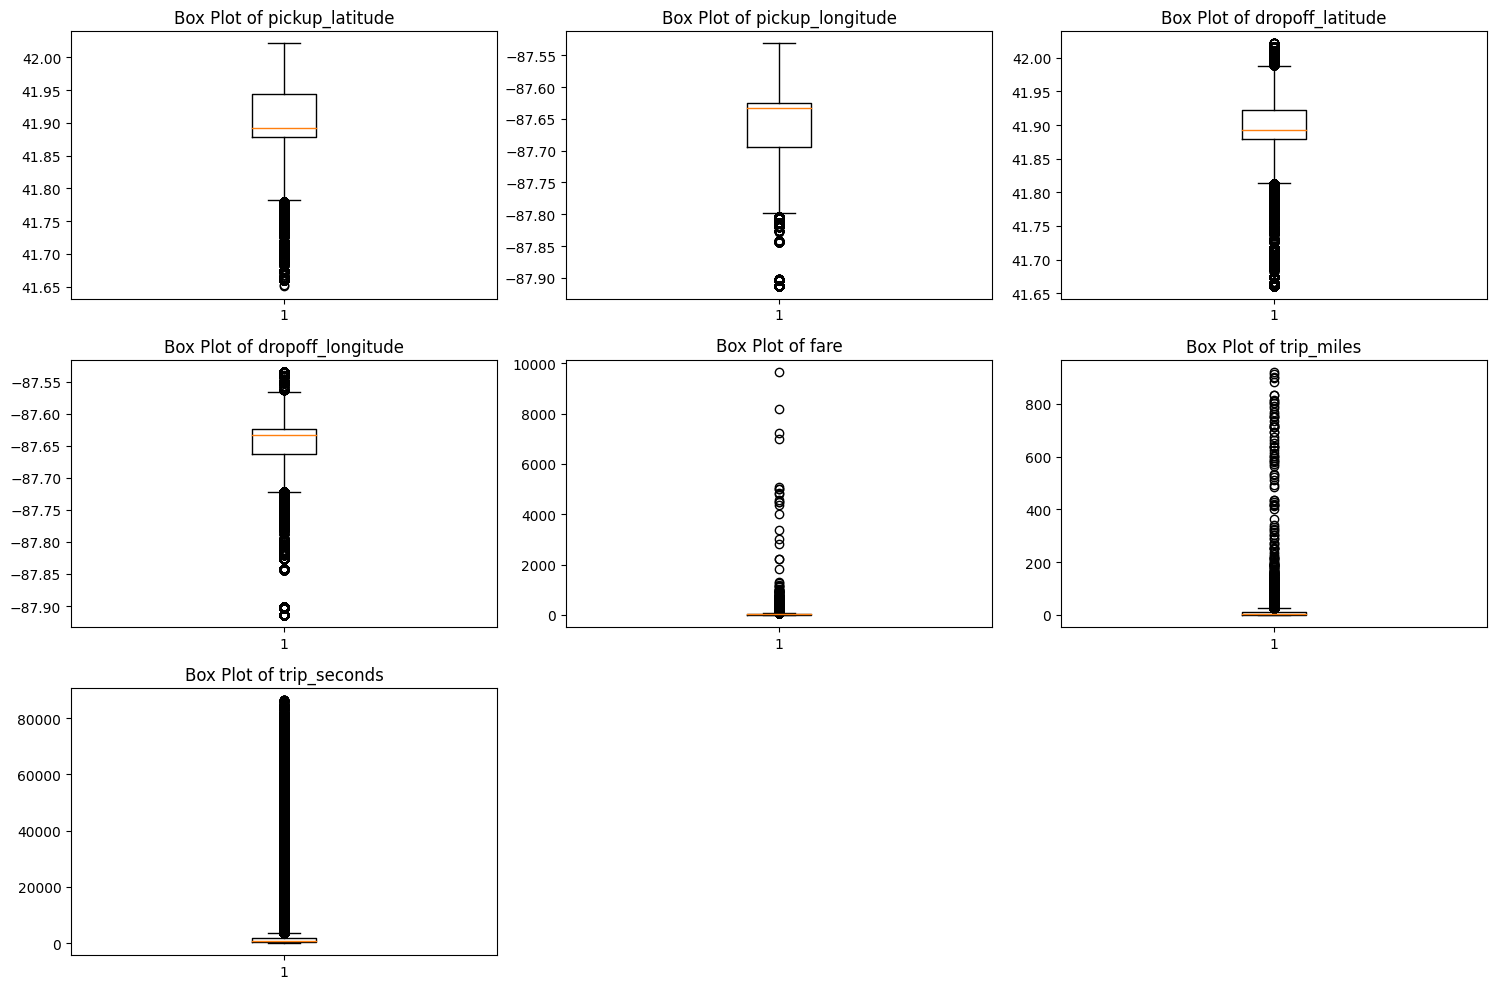

In [36]:
# Key columns to create box plots for
key_cols = ["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude", "fare", "trip_miles", "trip_seconds"]

# Plotting box plots for each column in key_cols
plt.figure(figsize=(15, 10))

for i, col in enumerate(key_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(non_null_df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

## Distribution of key features

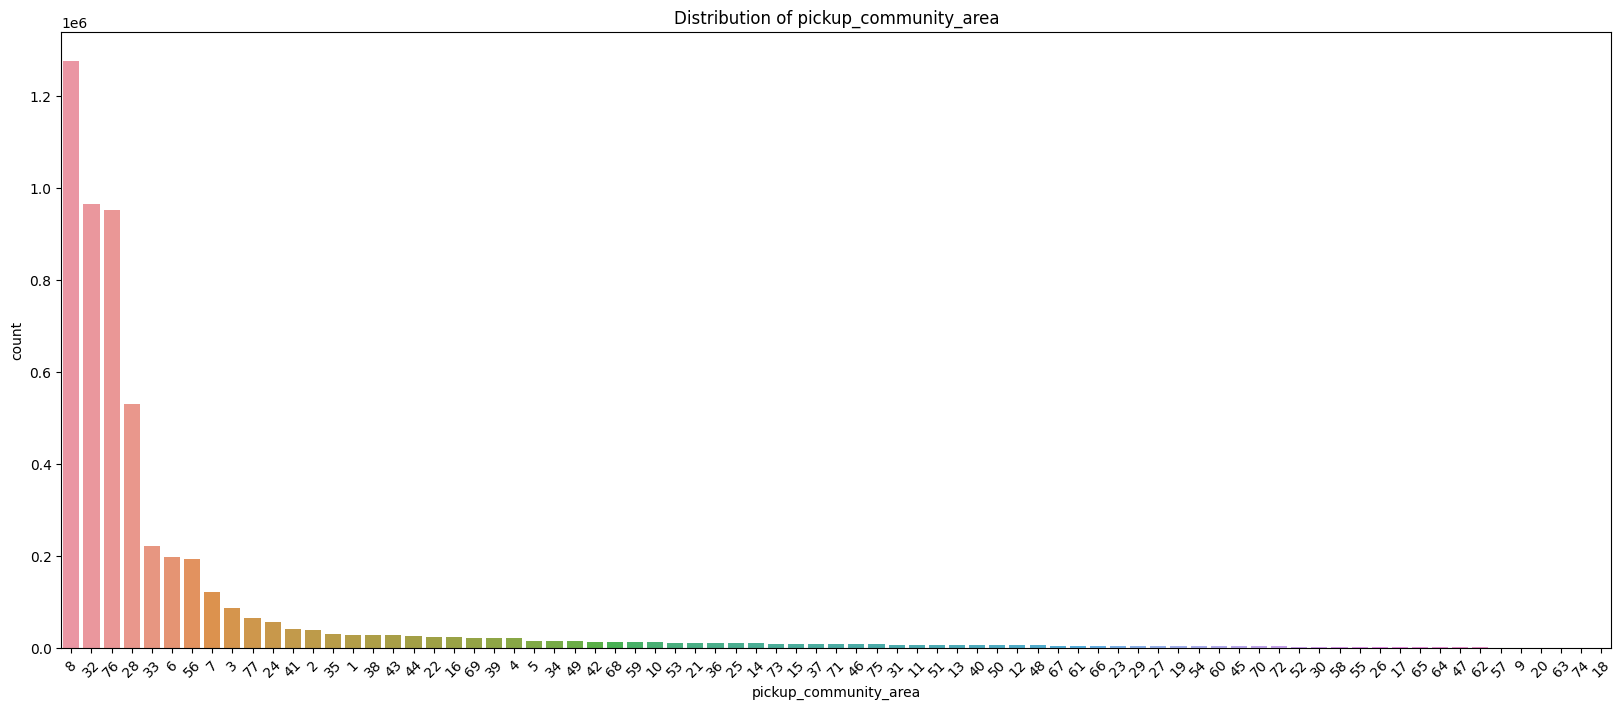

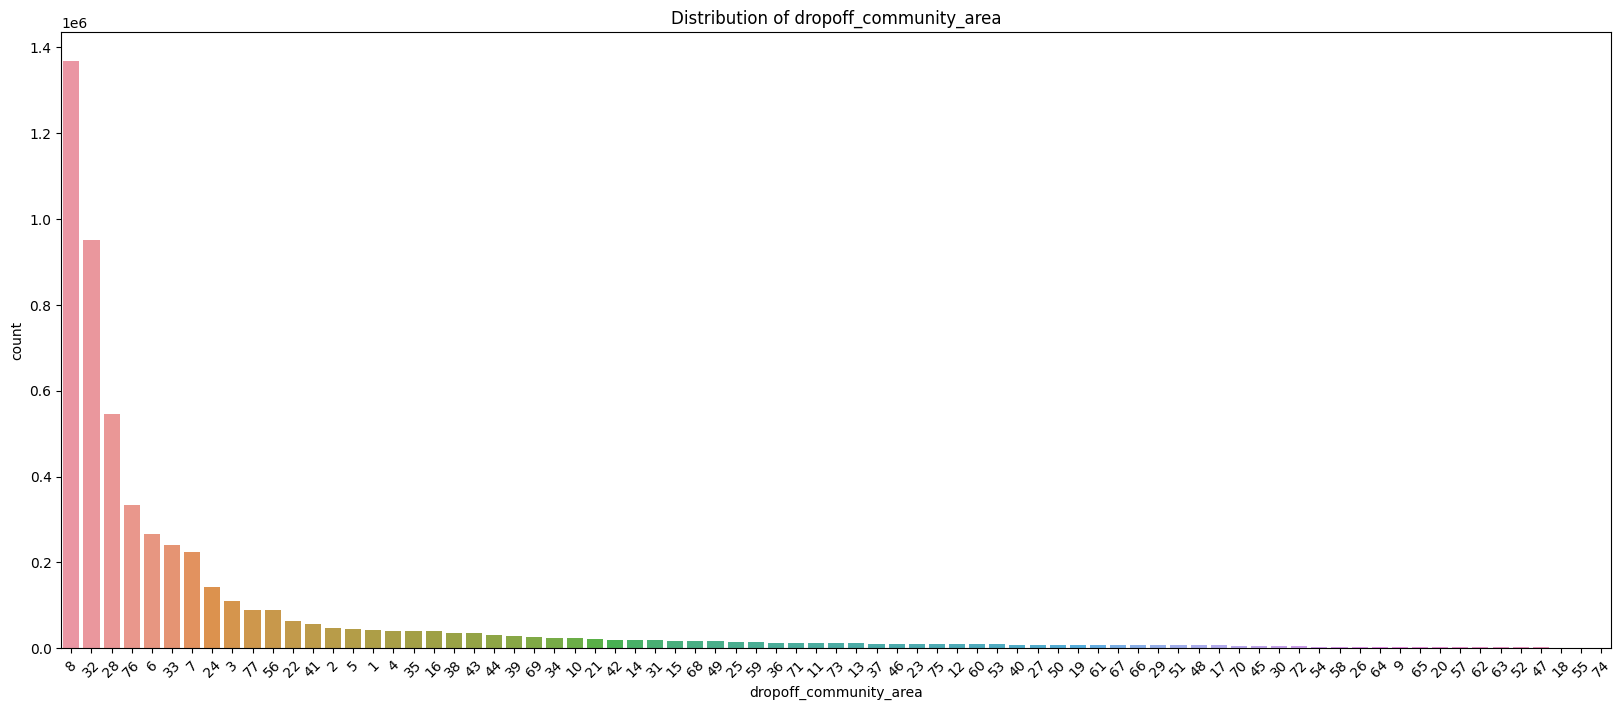

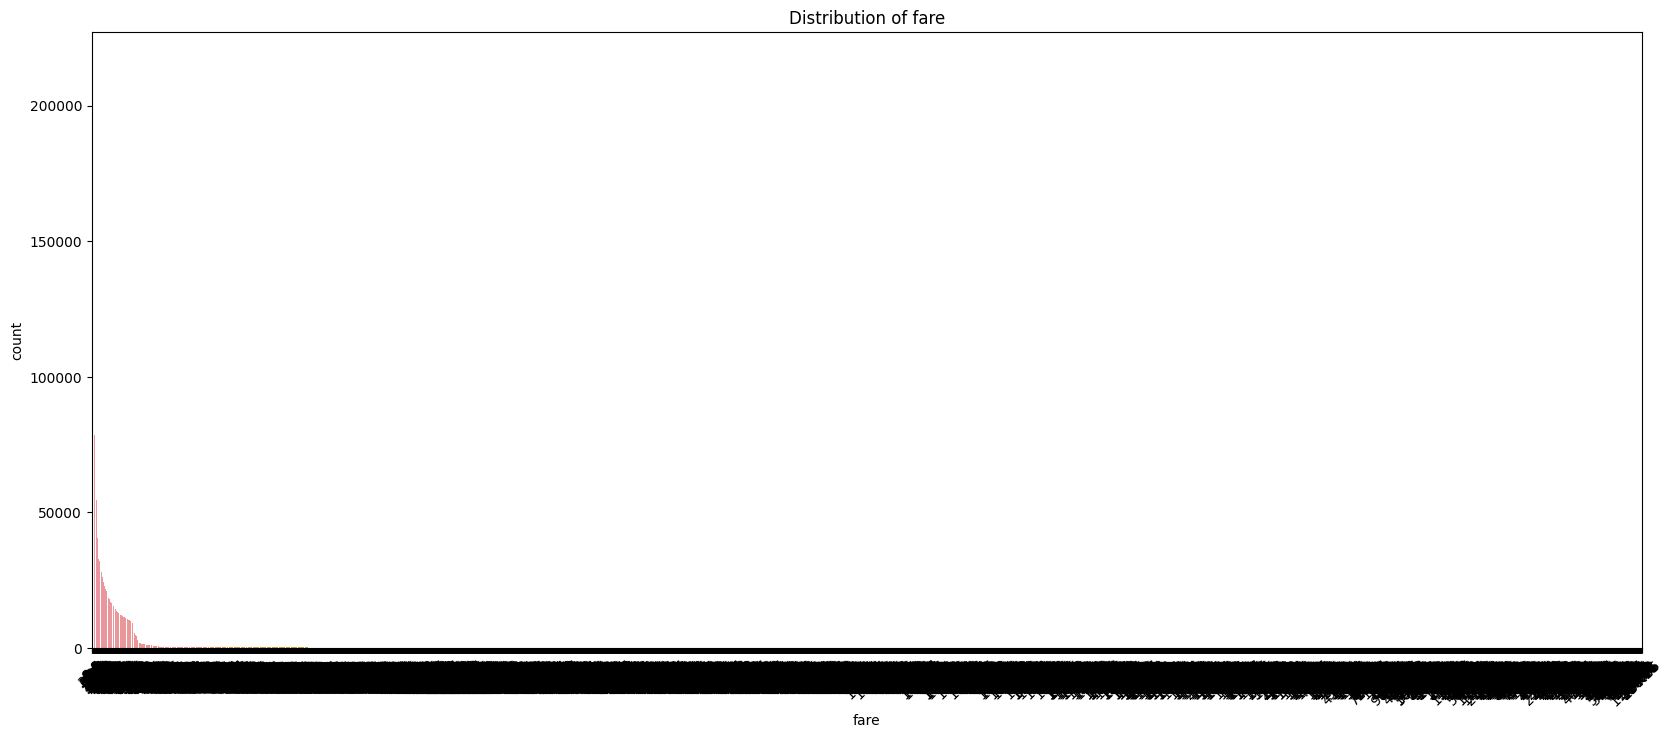

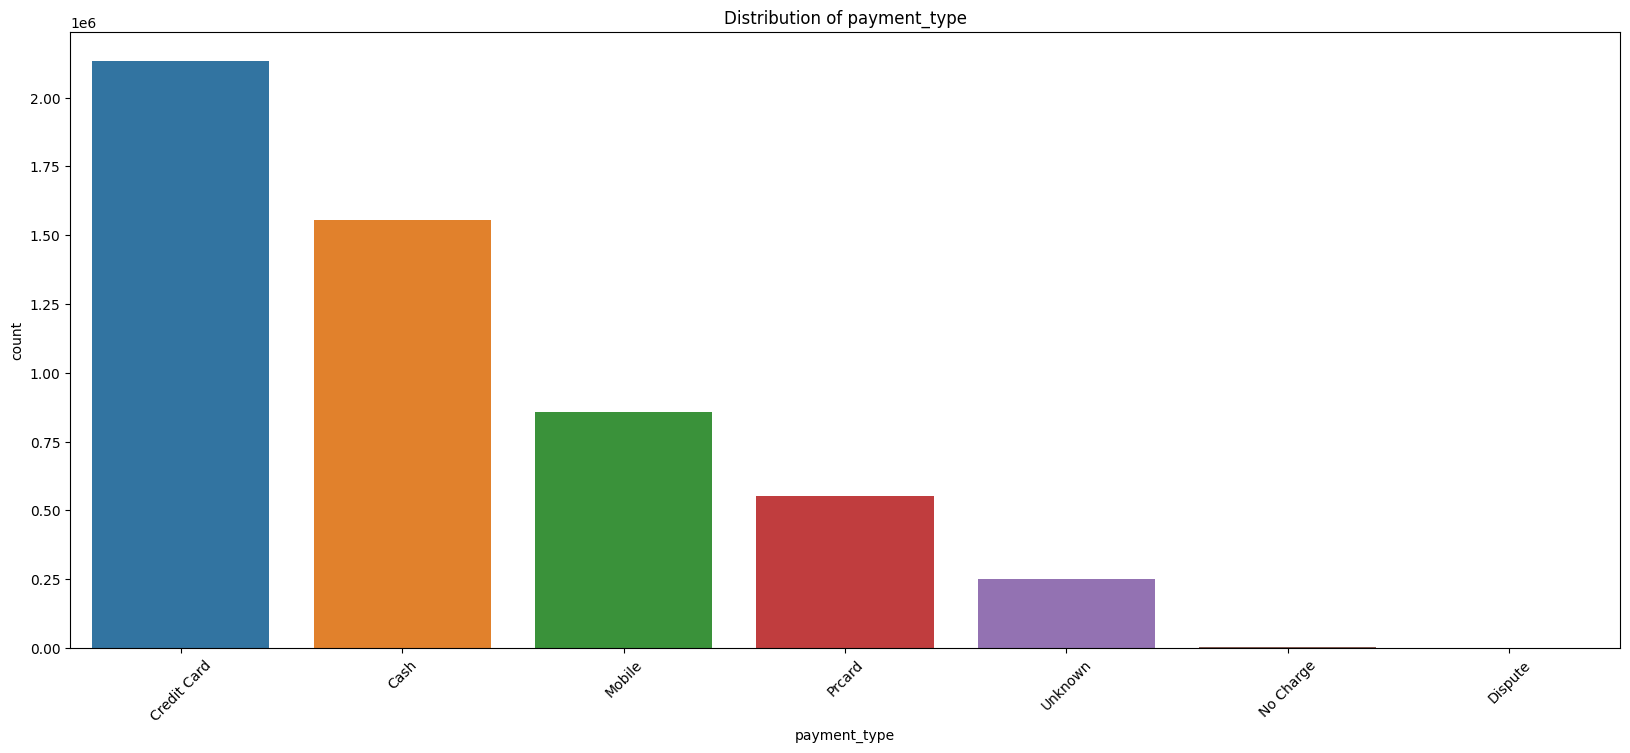

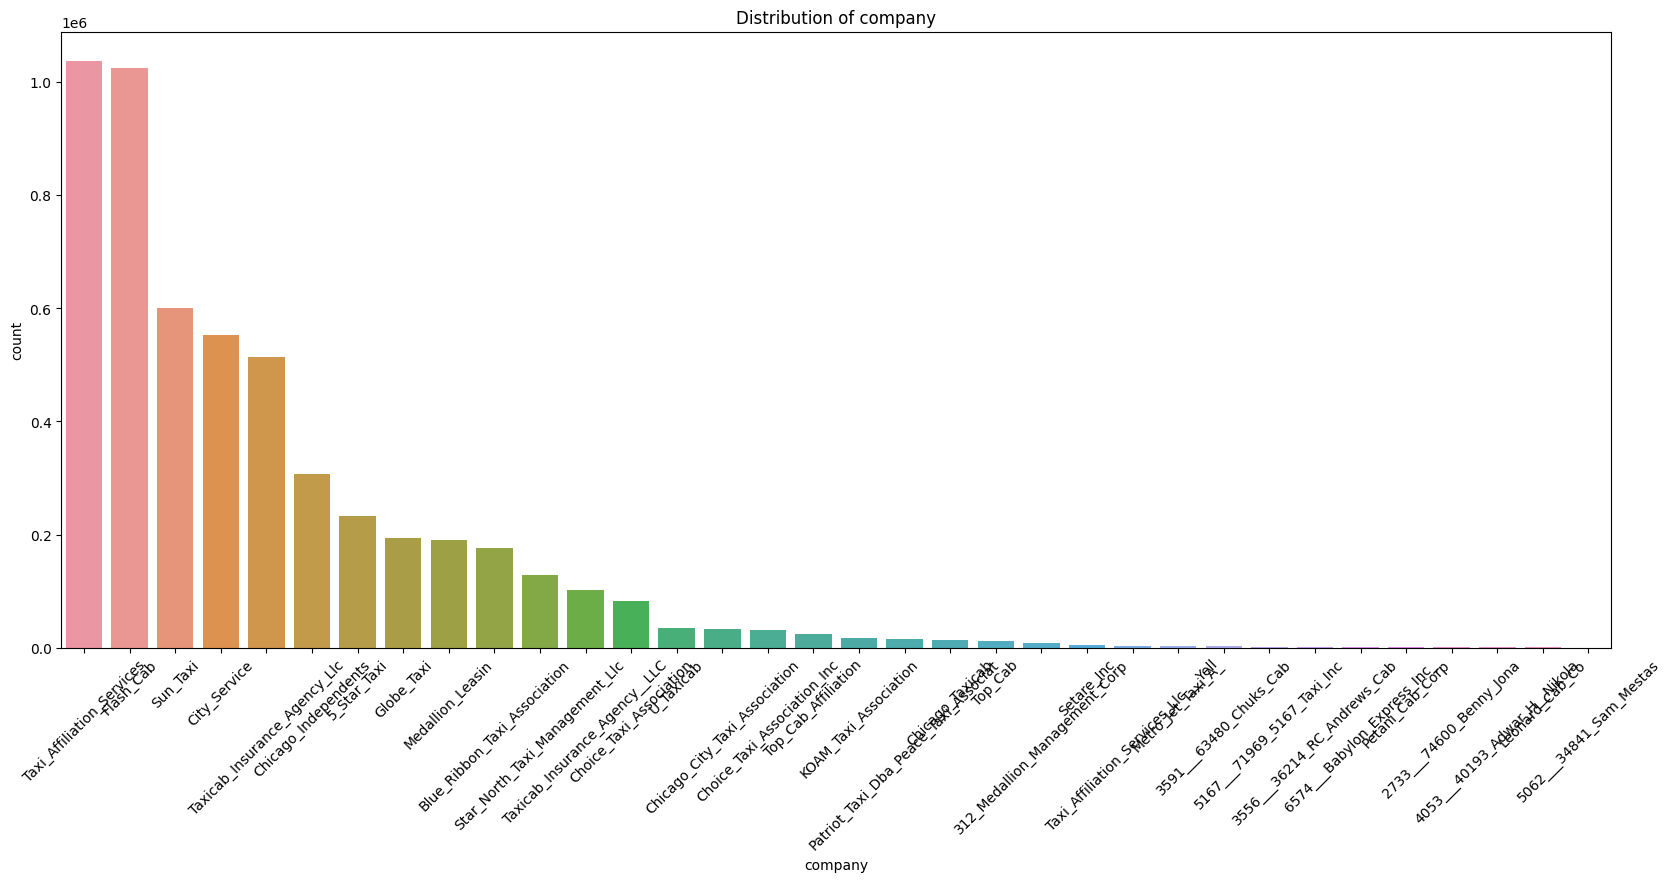

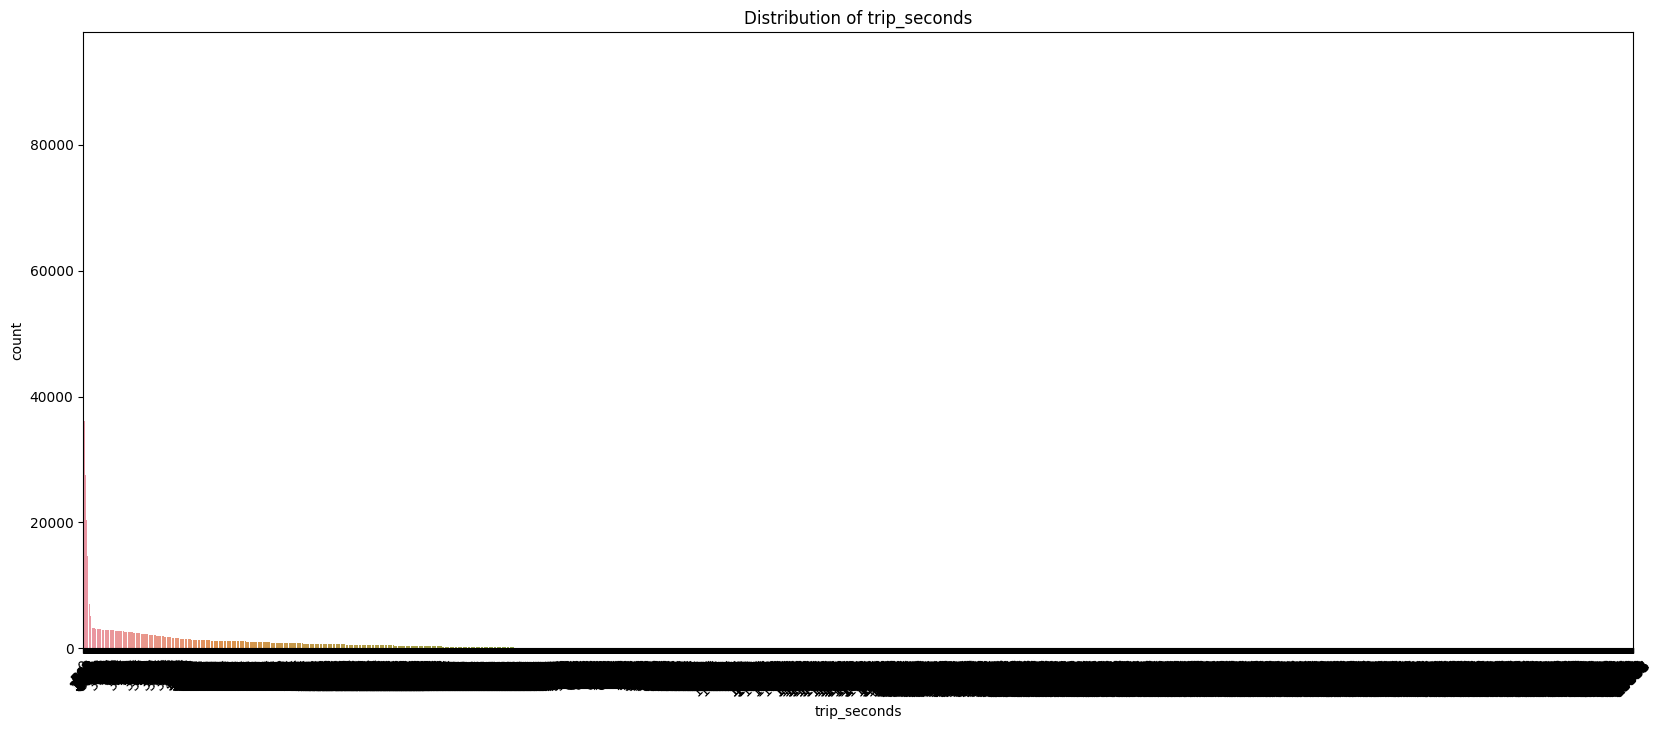

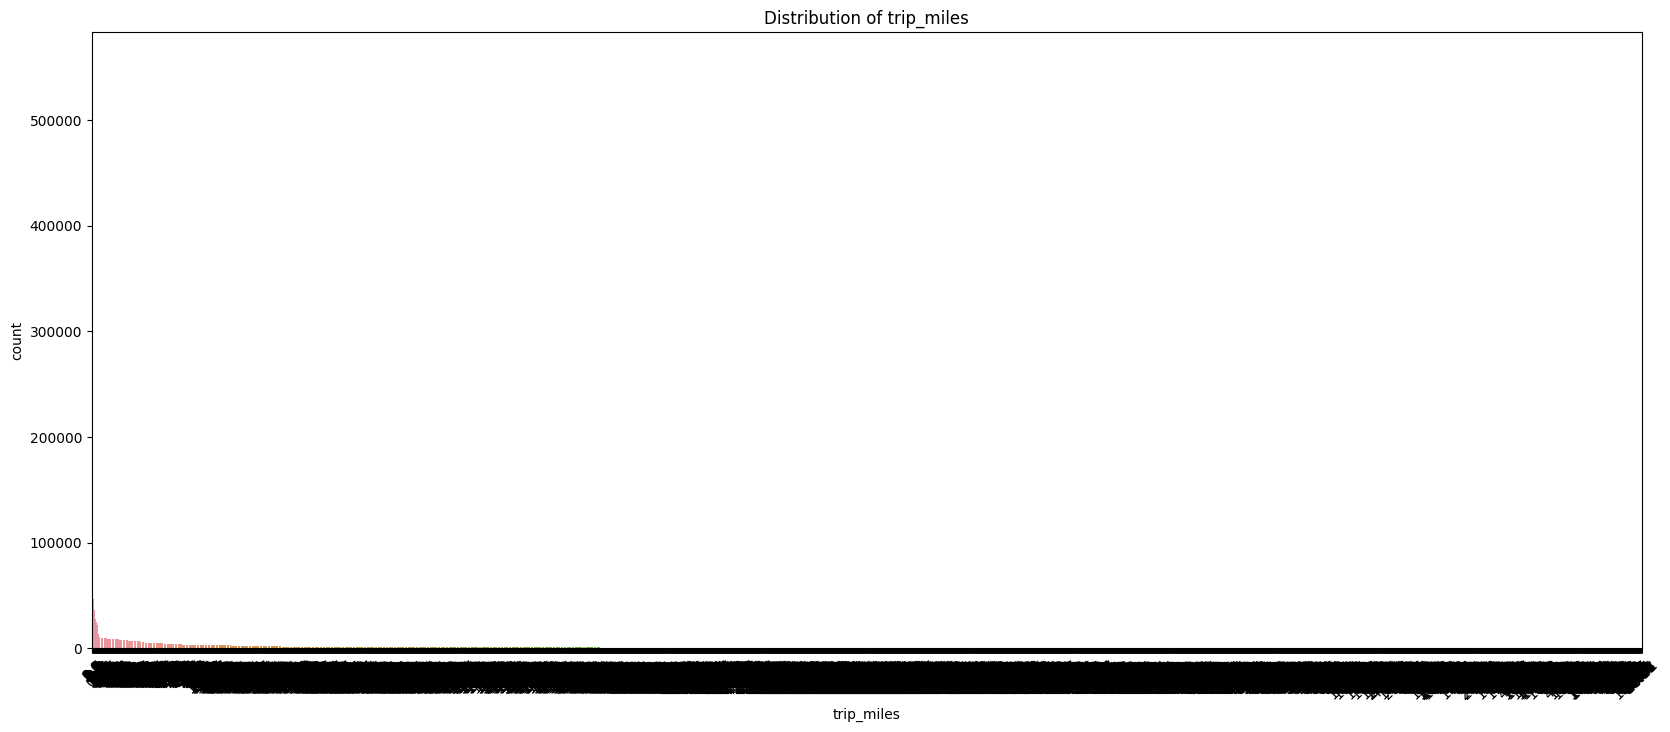

In [37]:
# Updated key columns for histogram distribution
key_cols_histogram = ["pickup_community_area", "dropoff_community_area", "fare", "payment_type", "company", "trip_seconds", "trip_miles"]


for column in key_cols_histogram:
    plt.figure(figsize=(20, 8))
    sns.countplot(data=non_null_df, x=column, order = non_null_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


### Further analysis in fare, trip_seconds and trip_miles

In [38]:
cols = ["fare", "trip_seconds", "trip_miles"]

for col in cols:
    percentile_99 = df[col].quantile(0.99)

    # Find outliers
    outliers = df[df[col] > percentile_99]

    print(f"99th Percentile Value of feature {col}:", percentile_99)

99th Percentile Value of feature fare: 72.25
99th Percentile Value of feature trip_seconds: 4374
99th Percentile Value of feature trip_miles: 26.5


## Correlation Analysis

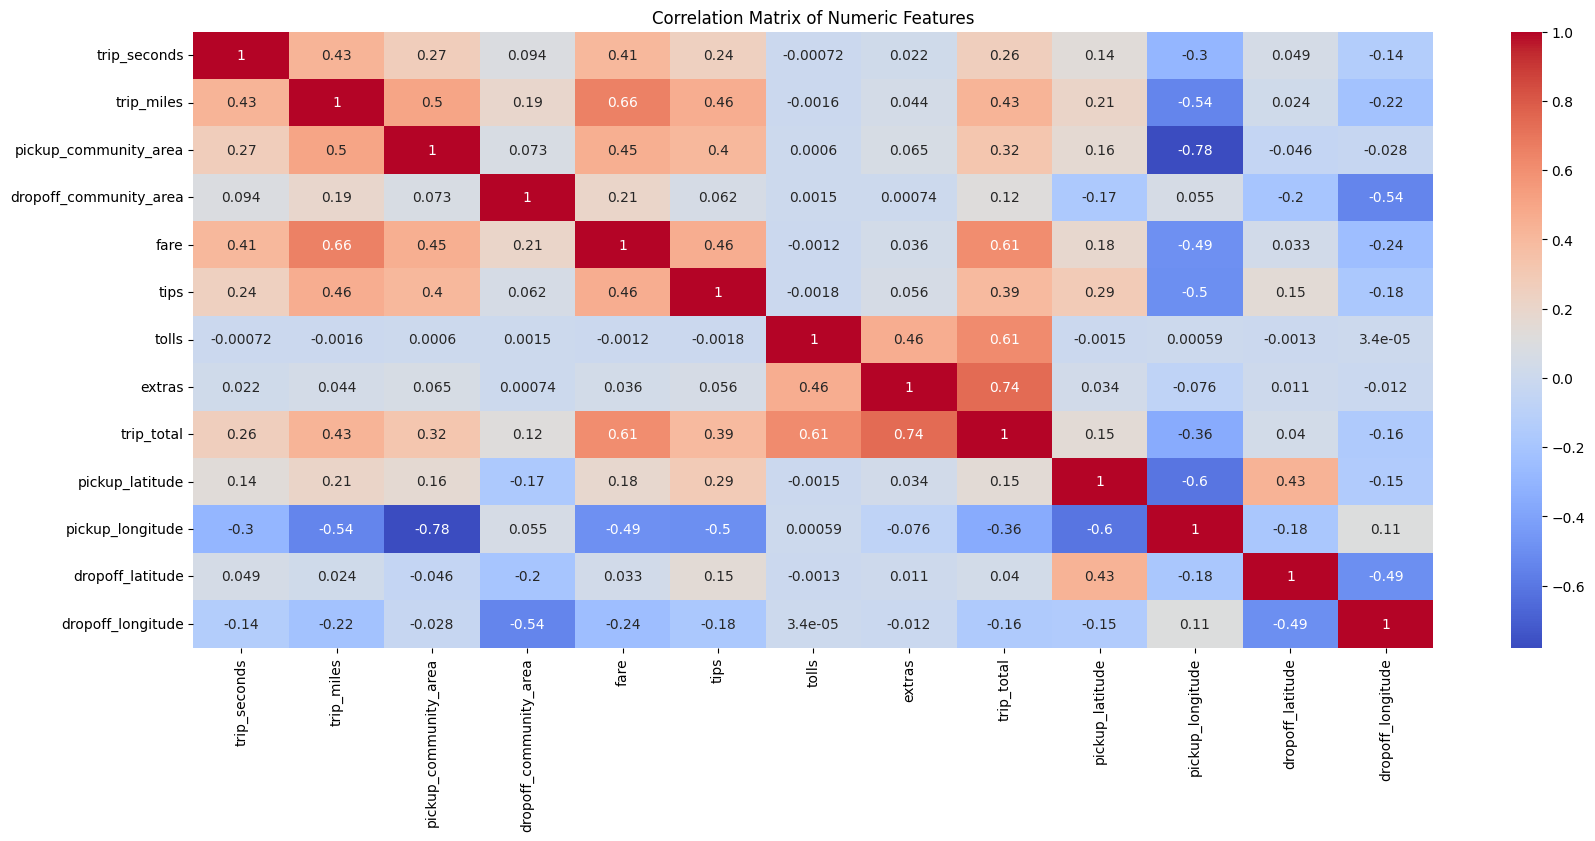

In [39]:
# Correlation matrix
correlation_matrix = non_null_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Average Fare per company

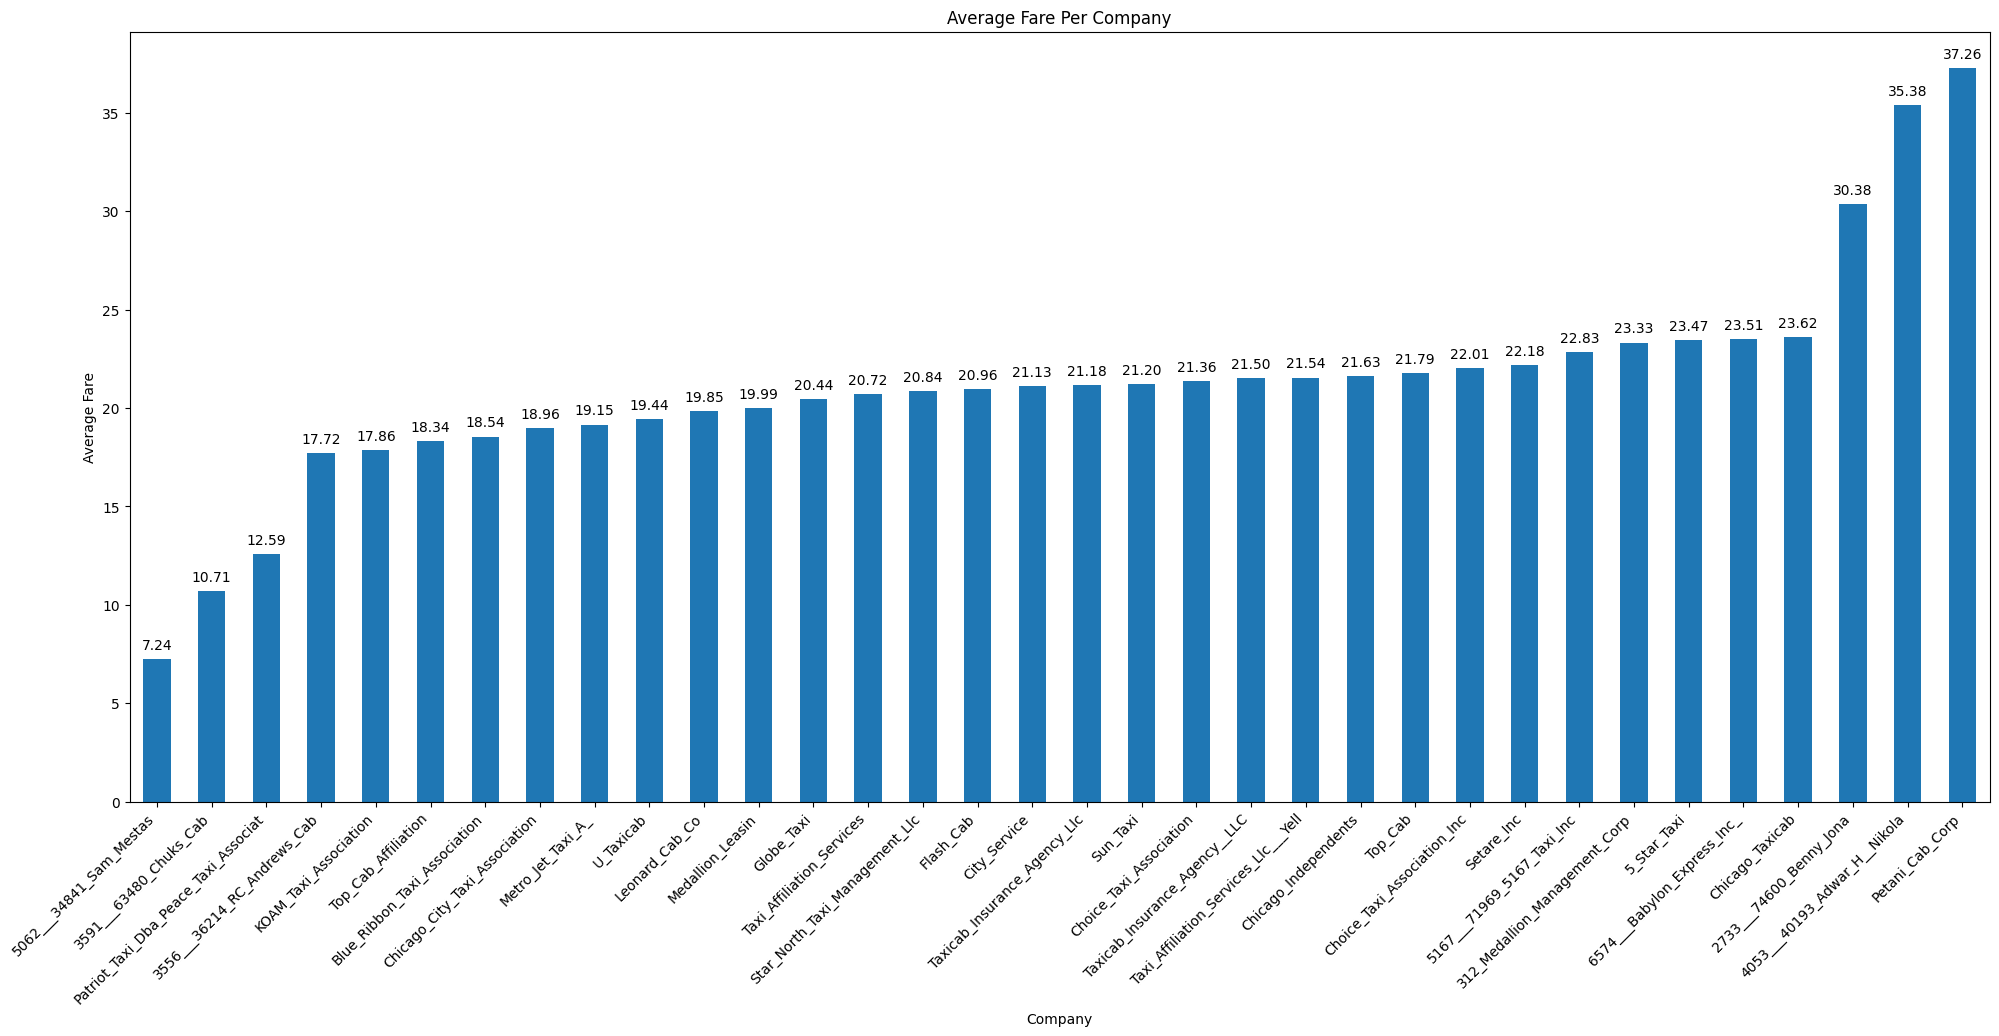

In [40]:
average_fare_per_company = non_null_df.groupby('company')['fare'].mean()

# Plotting the average fare per company in a bar chart with mean values on top
plt.figure(figsize=(24, 10))
ax = average_fare_per_company.sort_values().plot(kind='bar')
plt.title('Average Fare Per Company')
plt.xlabel('Company')
plt.ylabel('Average Fare')
plt.xticks(rotation=45, ha='right')

# Adding the mean value on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


### Average Fare per pickup_community_area

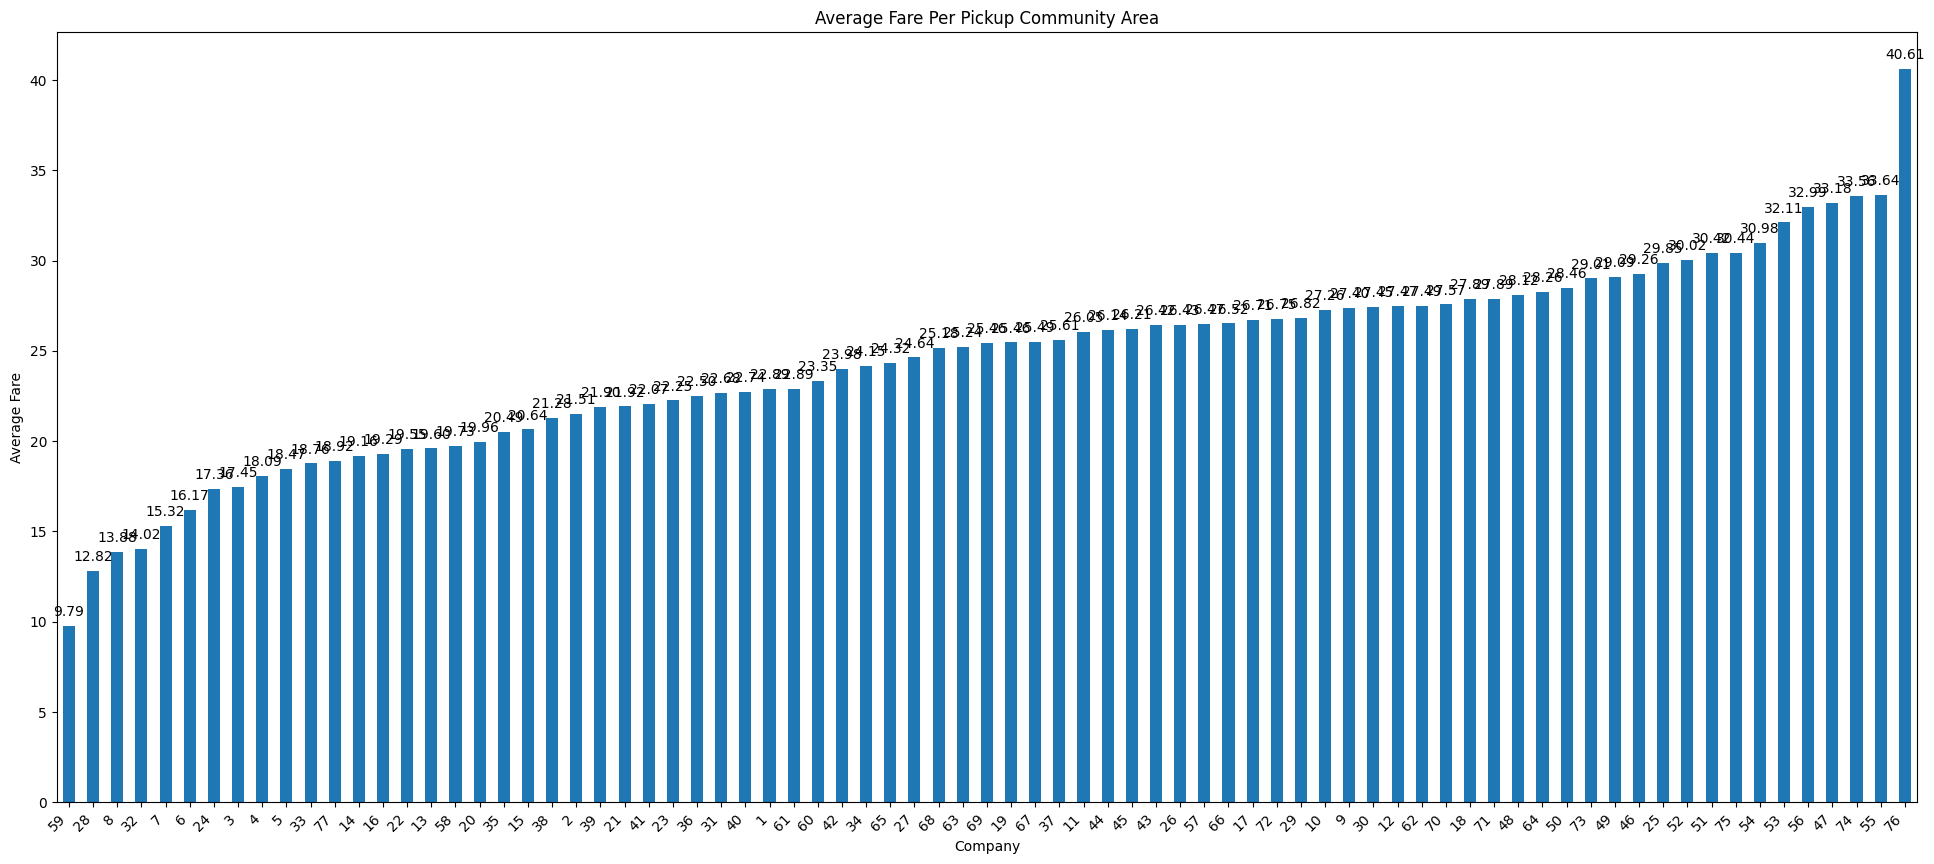

In [41]:
average_fare_per_pickup_community_area = non_null_df.groupby('pickup_community_area')['fare'].mean()

# Plotting the average fare per company in a bar chart with mean values on top
plt.figure(figsize=(24, 10))
ax = average_fare_per_pickup_community_area.sort_values().plot(kind='bar')
plt.title('Average Fare Per Pickup Community Area')
plt.xlabel('Company')
plt.ylabel('Average Fare')
plt.xticks(rotation=45, ha='right')

# Adding the mean value on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


### Average Fare per dropoff_community_area

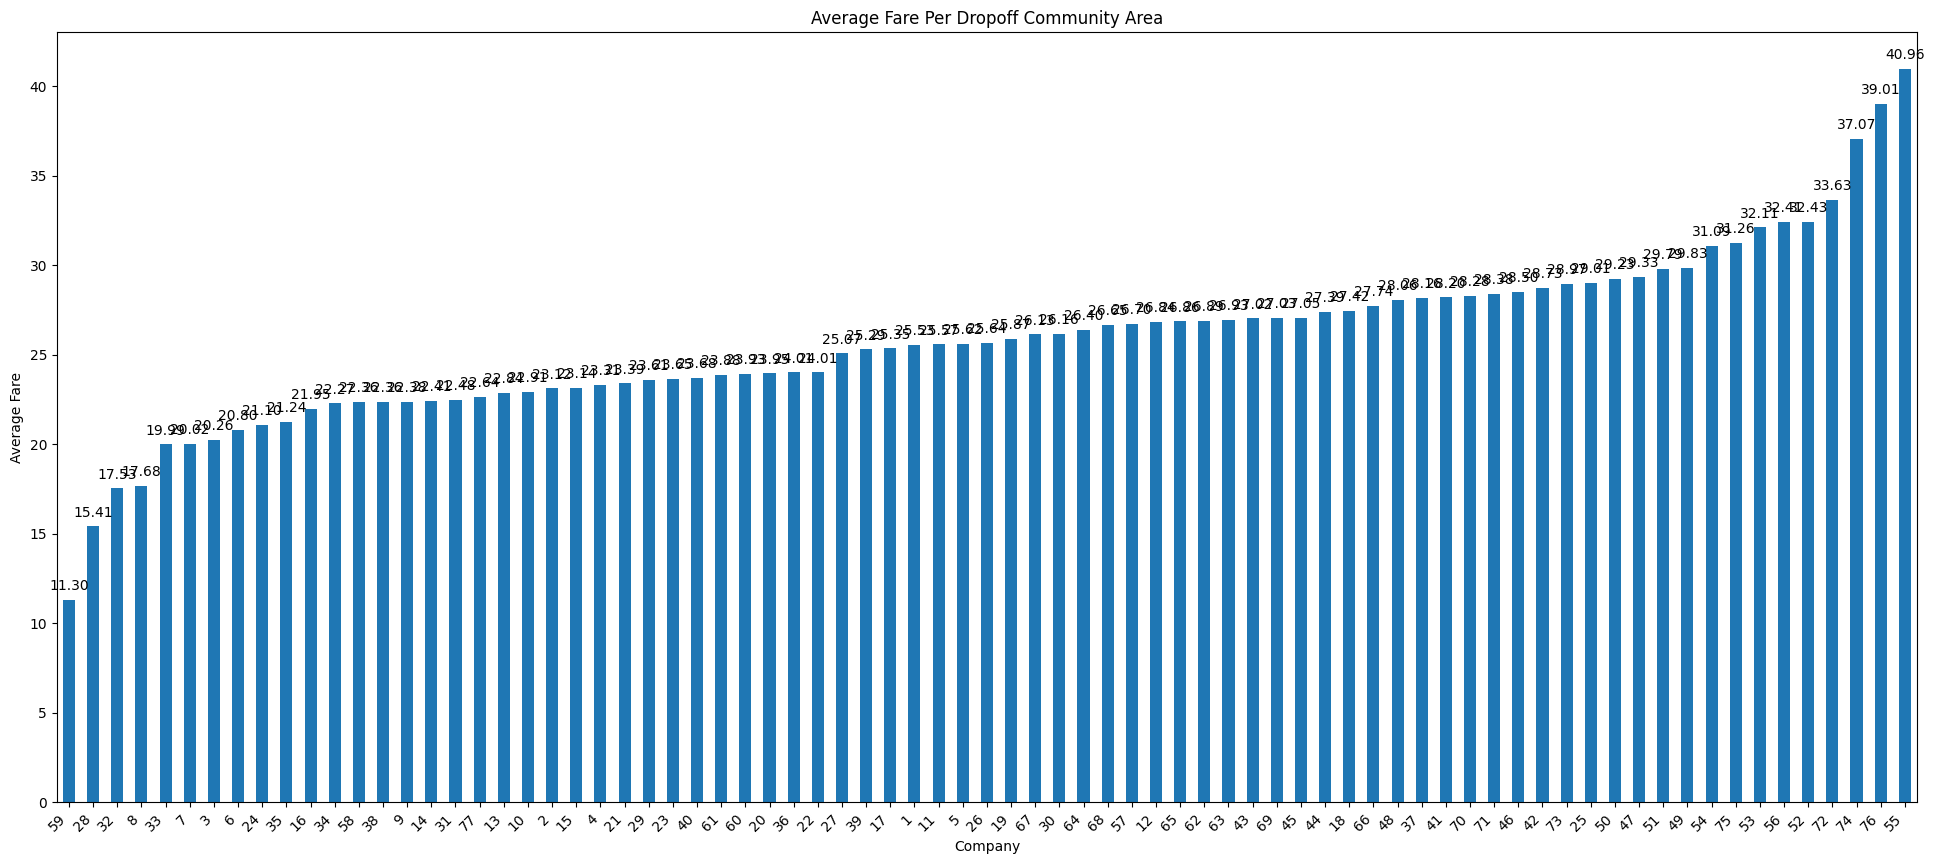

In [42]:
average_fare_per_dropoff_community_area = non_null_df.groupby('dropoff_community_area')['fare'].mean()

# Plotting the average fare per company in a bar chart with mean values on top
plt.figure(figsize=(24, 10))
ax = average_fare_per_dropoff_community_area.sort_values().plot(kind='bar')
plt.title('Average Fare Per Dropoff Community Area')
plt.xlabel('Company')
plt.ylabel('Average Fare')
plt.xticks(rotation=45, ha='right')

# Adding the mean value on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Average Fare per Month

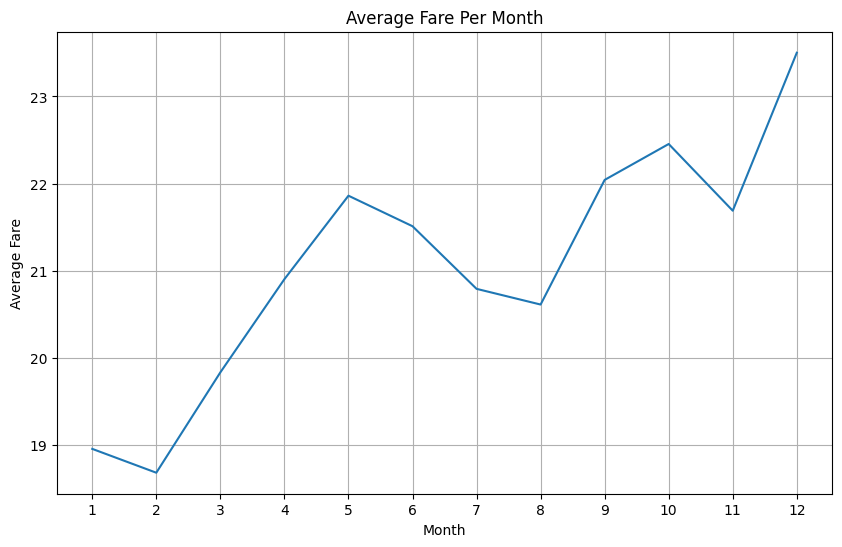

In [43]:
time_series_df = non_null_df.copy()
time_series_df['trip_start_timestamp'] = pd.to_datetime(time_series_df['trip_start_timestamp'])
time_series_df['trip_start_month'] = time_series_df['trip_start_timestamp'].dt.month
average_fare_per_month = time_series_df.groupby('trip_start_month')['fare'].mean()

plt.figure(figsize=(10, 6))
average_fare_per_month.plot(kind='line')
plt.title('Average Fare Per Month')
plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.xticks(range(1, 13))  # Set x-ticks to be every month
plt.grid(True)
plt.show()

### Average Fare per Hour

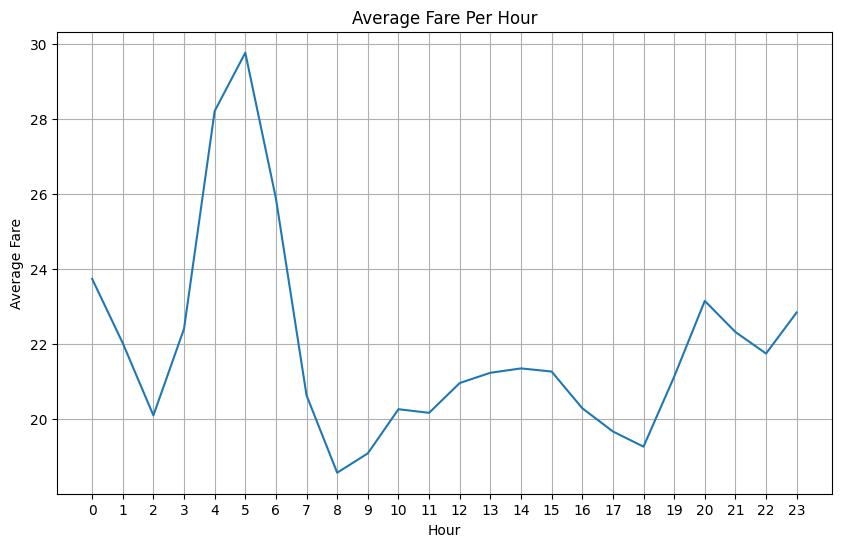

In [44]:
time_series_df = non_null_df.copy()
time_series_df['trip_start_timestamp'] = pd.to_datetime(time_series_df['trip_start_timestamp'])
time_series_df['trip_start_month'] = time_series_df['trip_start_timestamp'].dt.hour
average_fare_per_month = time_series_df.groupby('trip_start_month')['fare'].mean()

plt.figure(figsize=(10, 6))
average_fare_per_month.plot(kind='line')
plt.title('Average Fare Per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Fare')
plt.xticks(range(0, 24))  # Set x-ticks to be every month
plt.grid(True)
plt.show()

## Fare and Trip Miles

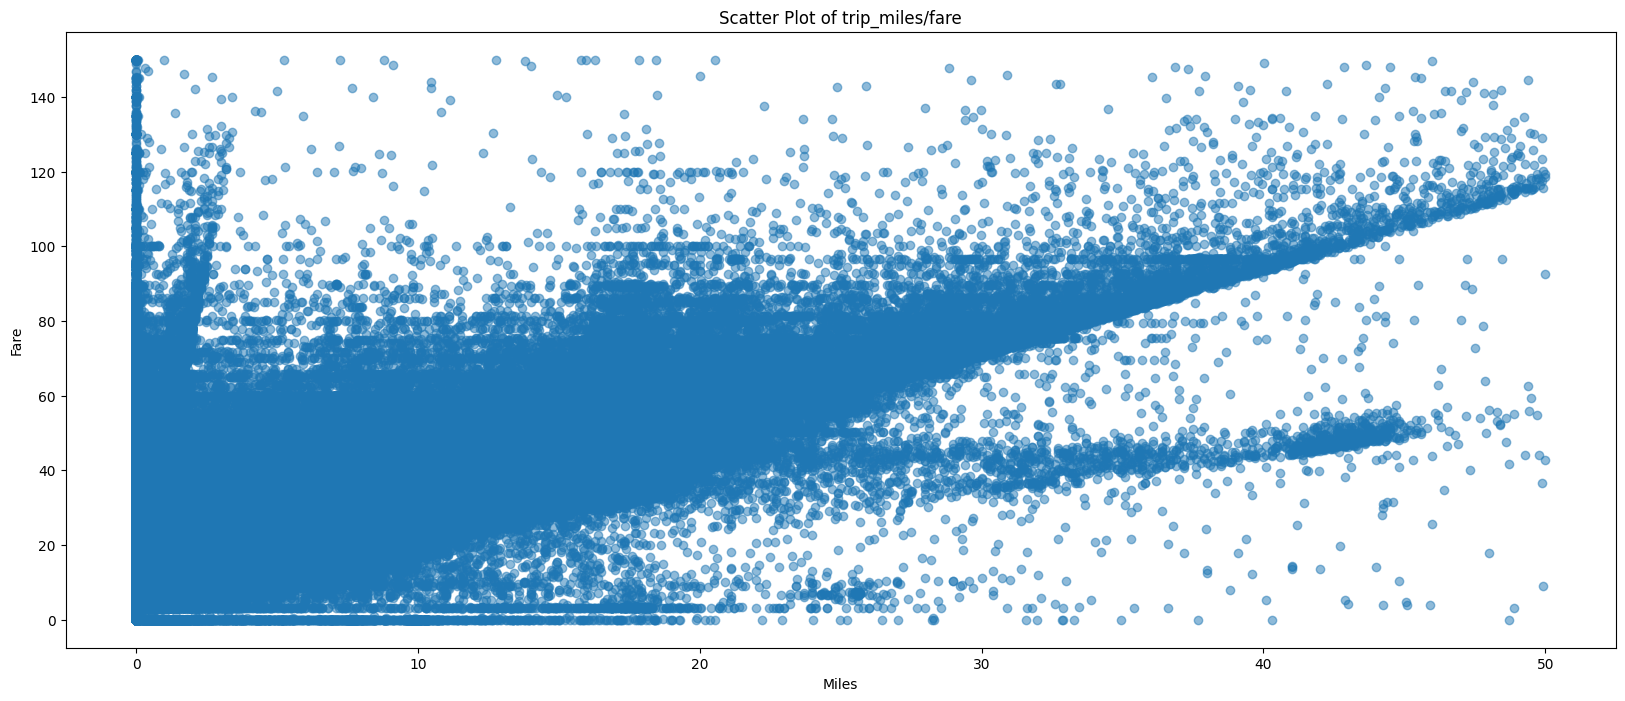

In [45]:
filtered_df = non_null_df[(non_null_df['trip_miles'] <= 50) & (non_null_df['fare'] <= 150)]
plt.figure(figsize=(20, 8))
plt.scatter(filtered_df['trip_miles'], filtered_df['fare'], alpha=0.5)
plt.title('Scatter Plot of trip_miles/fare')
plt.xlabel('Miles')
plt.ylabel('Fare')
plt.show()

## Fare and Trip Seconds

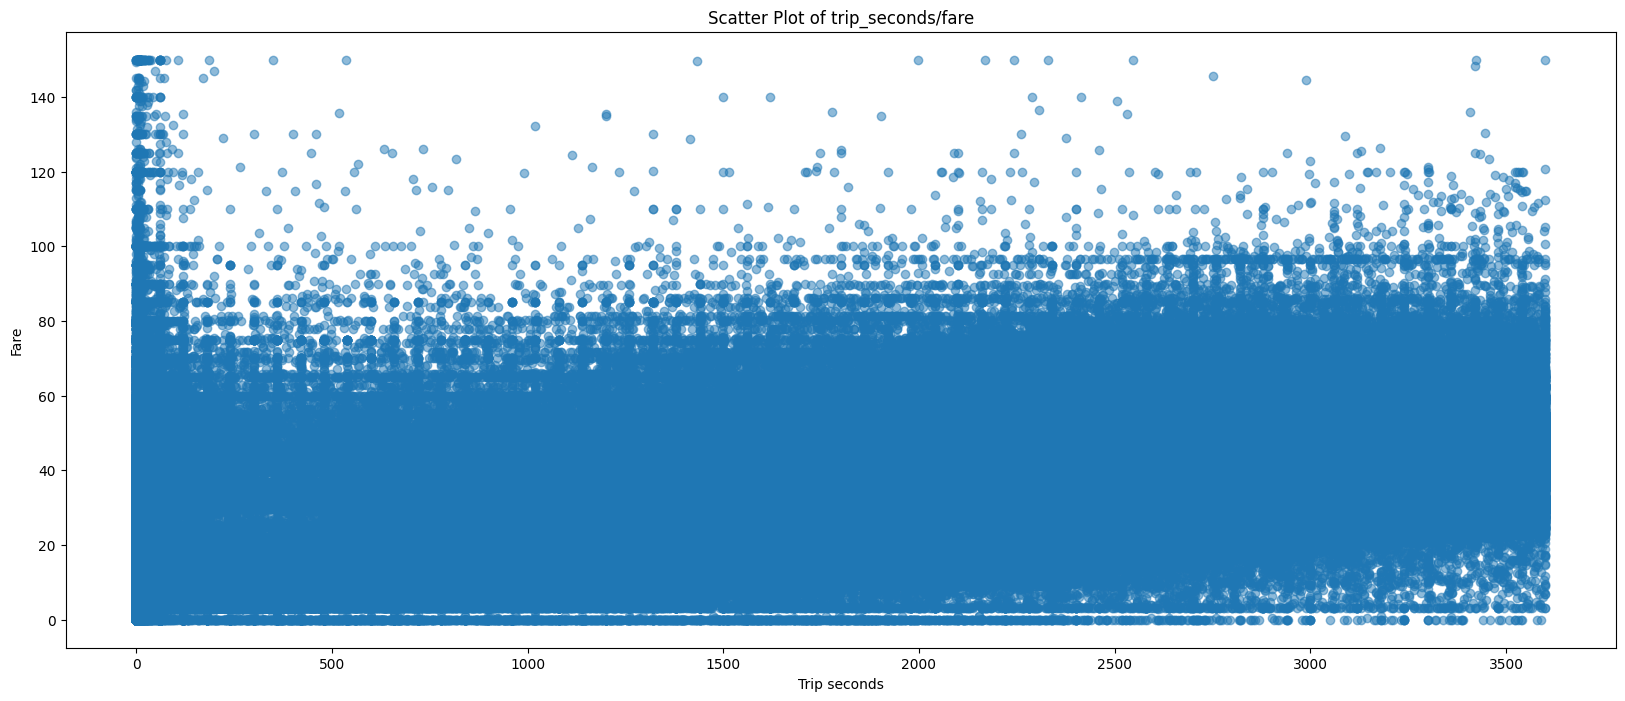

In [46]:
filtered_df = non_null_df[(non_null_df['trip_seconds'] <= 3600) & (non_null_df['fare'] <= 150)]
plt.figure(figsize=(20, 8))
plt.scatter(filtered_df['trip_seconds'], filtered_df['fare'], alpha=0.5)
plt.title('Scatter Plot of trip_seconds/fare')
plt.xlabel('Trip seconds')
plt.ylabel('Fare')
plt.show()

### Geographic Analysis

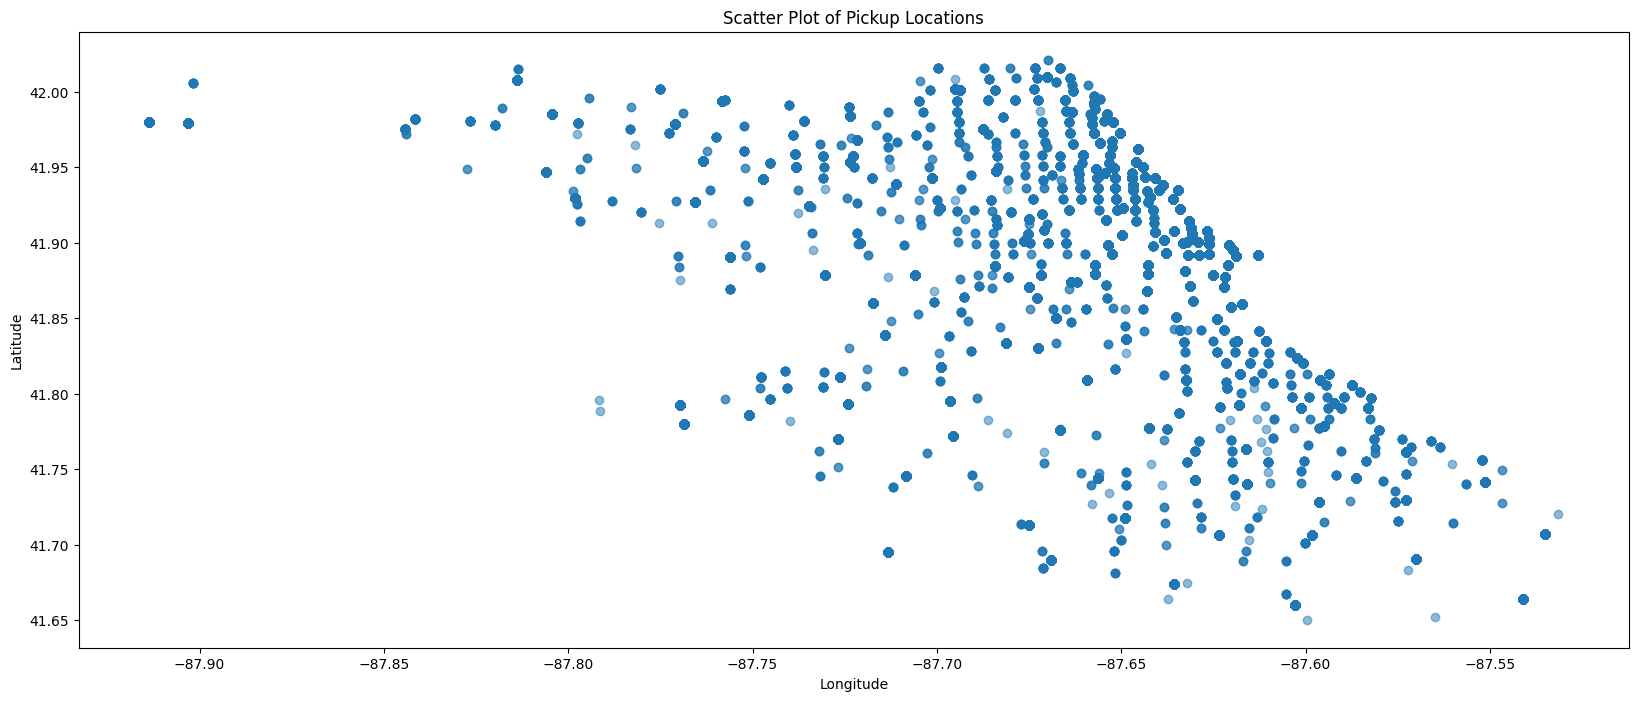

In [47]:
plt.figure(figsize=(20, 8))
plt.scatter(non_null_df['pickup_longitude'], non_null_df['pickup_latitude'], alpha=0.5)
plt.title('Scatter Plot of Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Average Fare per company

In [ ]:
average_fare_per_company = non_null_df.groupby('company')['fare'].mean()

# Plotting the average fare per company in a bar chart with mean values on top
plt.figure(figsize=(24, 10))
ax = average_fare_per_company.sort_values().plot(kind='bar')
plt.title('Average Fare Per Company')
plt.xlabel('Company')
plt.ylabel('Average Fare')
plt.xticks(rotation=45, ha='right')

# Adding the mean value on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()